In [2]:
import torch
print(torch.__version__)

2.0.1+cu118


In [3]:
torch.cuda.is_available()

True

In [4]:
torch.cuda.device_count()

1

In [5]:
torch.cuda.get_device_name()

'NVIDIA GeForce RTX 3050 Laptop GPU'

In [6]:
print(torch.cuda.get_device_capability())

(8, 6)


In [7]:
from super_gradients.training import Trainer
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val

[2023-08-28 12:01:55] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into C:\Users\ravit\sg_logs\console.log


[2023-08-28 12:01:56] WARNING - redirects.py - NOTE: Redirects are currently not supported in Windows or MacOs.
c:\Users\ravit\anaconda3\envs\project_ibmhackathon\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-08-28 12:02:02] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-08-28 12:02:02] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-08-28 12:02:02] WARNING - export.py - Failed to import pytorch_quantization
[2023-08-28 12:02:02] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-08-28 12:02:02] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.


In [8]:
from IPython.display import clear_output
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

In [9]:
from super_gradients.training import models

In [10]:
CHECKPOINT_DIR = 'D://PROJECTS/ibm_hackathon/project_industry/newnew_data/checkpoints'
trainer = Trainer(experiment_name='yolo_nas', ckpt_root_dir=CHECKPOINT_DIR)

In [11]:

dataset_params = {
    'data_dir':'D:/PROJECTS/ibm_hackathon/project_industry/newnew_data',
    'train_images_dir':'D:/PROJECTS/ibm_hackathon/project_industry/newnew_data/data/train/images',
    'train_labels_dir':'D:/PROJECTS/ibm_hackathon/project_industry/newnew_data/data/train/labels',
    'val_images_dir':'D:/PROJECTS/ibm_hackathon/project_industry/newnew_data/data/valid/images',
    'val_labels_dir':'D:/PROJECTS/ibm_hackathon/project_industry/newnew_data/data/valid/labels',
    'test_images_dir':'D:/PROJECTS/ibm_hackathon/project_industry/newnew_data/data/test/images',
    'test_labels_dir':'D:/PROJECTS/ibm_hackathon/project_industry/newnew_data/data/test/labels',
    'classes':['Fall Detected', 'Fire', 'Person', 'Smoke', 'Vest', 'hard hat']
}

In [12]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':0
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':0
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':0
    }
)

clear_output()

Caching annotations: 100%|██████████| 34/34 [00:00<00:00, 779.35it/s]


In [13]:
train_data.dataset.transforms

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': (640, 640), 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': (640, 640), 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': (640, 640), 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5),
 DetectionPaddedRescale('additional_samples_count': 0, 'non_em

In [14]:
train_data.dataset.dataset_params['transforms'][1]

{'DetectionRandomAffine': {'degrees': 10.0, 'translate': 0.1, 'scales': [0.1, 2], 'shear': 2.0, 'target_size': [640, 640], 'filter_box_candidates': True, 'wh_thr': 2, 'area_thr': 0.1, 'ar_thr': 20}}

In [15]:
train_data.dataset.dataset_params['transforms'][1]

{'DetectionRandomAffine': {'degrees': 10.0, 'translate': 0.1, 'scales': [0.1, 2], 'shear': 2.0, 'target_size': [640, 640], 'filter_box_candidates': True, 'wh_thr': 2, 'area_thr': 0.1, 'ar_thr': 20}}

In [16]:
train_data.dataset.dataset_params['transforms'][1]['DetectionRandomAffine']['degrees'] = 10.42

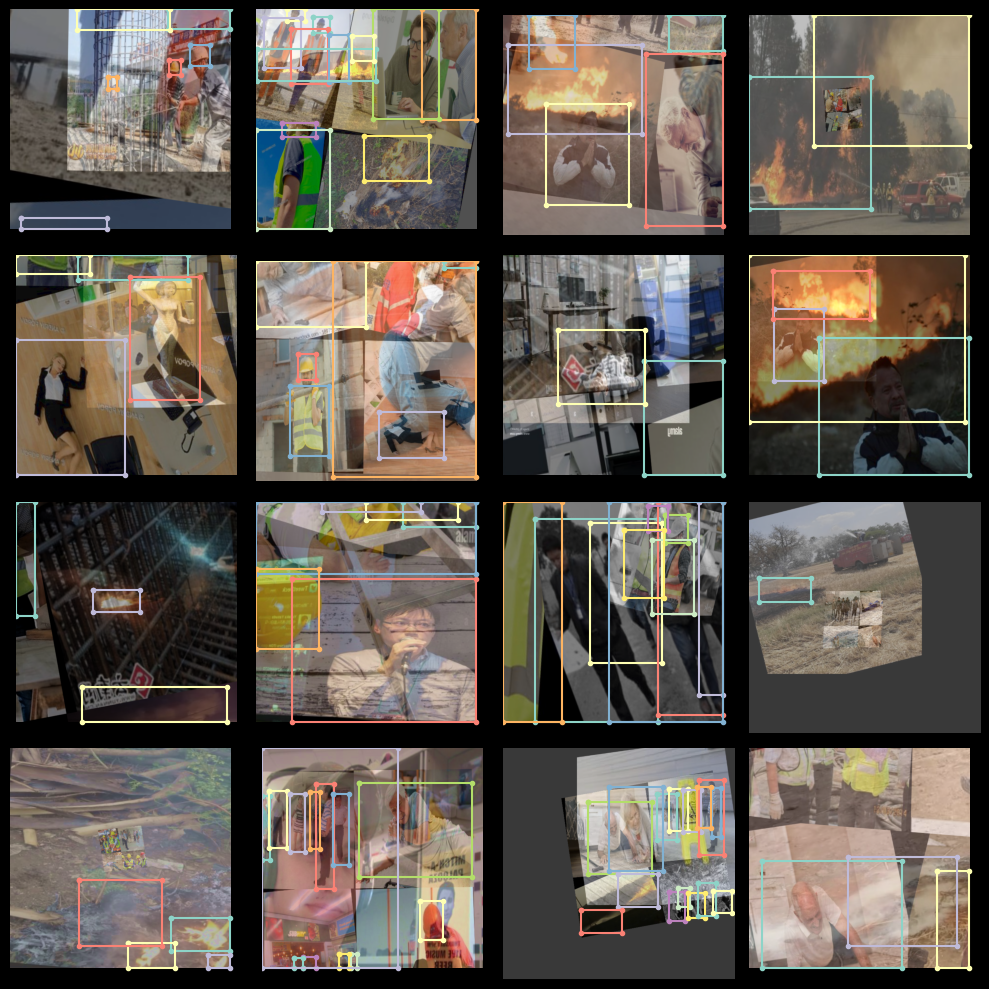

In [17]:
train_data.dataset.plot()

In [20]:

model = models.get('yolo_nas_l', 
                   num_classes=len(dataset_params['classes']), 
                   pretrained_weights="coco"
                   )
     

[2023-08-28 12:02:55] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.


In [19]:
train_params = {
    # ENABLING SILENT MODE
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs":60,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}


In [33]:
%%time
trainer.train(model=model, 
              training_params=train_params, 
              train_loader=train_data, 
              valid_loader=val_data)

The console stream is now moved to D://PROJECTS/ibm_hackathon/project_industry/newnew_data/checkpoints\yolo_nas/console_Aug27_21_55_56.txt


[2023-08-27 21:55:56] WARNING - base.py - Ignoring invalid distribution -orch (c:\users\ravit\anaconda3\envs\project_ibmhackathon\lib\site-packages)
[2023-08-27 21:55:56] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
[2023-08-27 21:55:57] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Dataset size:                 720        (len(train_set))
    - Batch size per GPU:           8          (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             8          (num_gpus * batch_size)
    - Effective Batch size:         8          (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         90         (len(train_loader))
    - Gradient updates per epoch:   90         (len(train_loader) / batch_accumulate)

[2023-08-27 21:55:57] INFO - sg_trainer.py

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.9871
│   ├── Ppyoloeloss/loss_iou = 0.2928
│   ├── Ppyoloeloss/loss_dfl = 1.7163
│   └── Ppyoloeloss/loss = 3.5773
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.0367
    ├── Ppyoloeloss/loss_iou = 0.2853
    ├── Ppyoloeloss/loss_dfl = 1.7056
    ├── Ppyoloeloss/loss = 3.6027
    ├── Precision@0.50 = 0.0006
    ├── Recall@0.50 = 0.0
    ├── Map@0.50 = 0.0014
    └── F1@0.50 = 0.0



Validating epoch 1: 100%|██████████| 9/9 [00:17<00:00,  1.91s/it]
[2023-08-27 22:19:42] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ibm_hackathon/project_industry/newnew_data/checkpoints\yolo_nas\ckpt_best.pth
[2023-08-27 22:19:42] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.305662602186203


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.4065
│   │   ├── Epoch N-1      = 1.9871 (↘ -0.5806)
│   │   └── Best until now = 1.9871 (↘ -0.5806)
│   ├── Ppyoloeloss/loss_iou = 0.2666
│   │   ├── Epoch N-1      = 0.2928 (↘ -0.0263)
│   │   └── Best until now = 0.2928 (↘ -0.0263)
│   ├── Ppyoloeloss/loss_dfl = 1.6239
│   │   ├── Epoch N-1      = 1.7163 (↘ -0.0924)
│   │   └── Best until now = 1.7163 (↘ -0.0924)
│   └── Ppyoloeloss/loss = 2.8849
│       ├── Epoch N-1      = 3.5773 (↘ -0.6925)
│       └── Best until now = 3.5773 (↘ -0.6925)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.691
    │   ├── Epoch N-1      = 2.0367 (↘ -0.3457)
    │   └── Best until now = 2.0367 (↘ -0.3457)
    ├── Ppyoloeloss/loss_iou = 0.2941
    │   ├── Epoch N-1      = 0.2853 (↗ 0.0089)
    │   └── Best until now = 0.2853 (↗ 0.0089)
    ├── Ppyoloeloss/loss_dfl = 1.7999
    │   ├── Epoch N-1      = 1.7056 (↗ 0.0942)
    │   └── Best until now = 1.7056 (↗ 0.0942)
    ├── Ppyoloeloss/loss = 

Validating epoch 2: 100%|██████████| 9/9 [00:16<00:00,  1.80s/it]


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.289
│   │   ├── Epoch N-1      = 1.4065 (↘ -0.1175)
│   │   └── Best until now = 1.4065 (↘ -0.1175)
│   ├── Ppyoloeloss/loss_iou = 0.2738
│   │   ├── Epoch N-1      = 0.2666 (↗ 0.0072)
│   │   └── Best until now = 0.2666 (↗ 0.0072)
│   ├── Ppyoloeloss/loss_dfl = 1.6474
│   │   ├── Epoch N-1      = 1.6239 (↗ 0.0235)
│   │   └── Best until now = 1.6239 (↗ 0.0235)
│   └── Ppyoloeloss/loss = 2.7972
│       ├── Epoch N-1      = 2.8849 (↘ -0.0877)
│       └── Best until now = 2.8849 (↘ -0.0877)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.5878
    │   ├── Epoch N-1      = 1.691  (↘ -0.1032)
    │   └── Best until now = 1.691  (↘ -0.1032)
    ├── Ppyoloeloss/loss_iou = 0.305
    │   ├── Epoch N-1      = 0.2941 (↗ 0.0109)
    │   └── Best until now = 0.2853 (↗ 0.0197)
    ├── Ppyoloeloss/loss_dfl = 1.8686
    │   ├── Epoch N-1      = 1.7999 (↗ 0.0687)
    │   └── Best until now = 1.7056 (↗ 0.1629)
    ├── Ppyoloeloss/loss = 3.284

Validating epoch 3: 100%|██████████| 9/9 [00:14<00:00,  1.64s/it]


SUMMARY OF EPOCH 3
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2752
│   │   ├── Epoch N-1      = 1.289  (↘ -0.0139)
│   │   └── Best until now = 1.289  (↘ -0.0139)
│   ├── Ppyoloeloss/loss_iou = 0.2752
│   │   ├── Epoch N-1      = 0.2738 (↗ 0.0014)
│   │   └── Best until now = 0.2666 (↗ 0.0086)
│   ├── Ppyoloeloss/loss_dfl = 1.662
│   │   ├── Epoch N-1      = 1.6474 (↗ 0.0146)
│   │   └── Best until now = 1.6239 (↗ 0.038)
│   └── Ppyoloeloss/loss = 2.7942
│       ├── Epoch N-1      = 2.7972 (↘ -0.003)
│       └── Best until now = 2.7972 (↘ -0.003)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.722
    │   ├── Epoch N-1      = 1.5878 (↗ 0.1342)
    │   └── Best until now = 1.5878 (↗ 0.1342)
    ├── Ppyoloeloss/loss_iou = 0.3269
    │   ├── Epoch N-1      = 0.305  (↗ 0.0218)
    │   └── Best until now = 0.2853 (↗ 0.0416)
    ├── Ppyoloeloss/loss_dfl = 1.9652
    │   ├── Epoch N-1      = 1.8686 (↗ 0.0967)
    │   └── Best until now = 1.7056 (↗ 0.2596)
    ├── Ppyoloeloss/loss = 3.5218
   

Validating epoch 4: 100%|██████████| 9/9 [00:14<00:00,  1.64s/it]


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.293
│   │   ├── Epoch N-1      = 1.2752 (↗ 0.0179)
│   │   └── Best until now = 1.2752 (↗ 0.0179)
│   ├── Ppyoloeloss/loss_iou = 0.2724
│   │   ├── Epoch N-1      = 0.2752 (↘ -0.0028)
│   │   └── Best until now = 0.2666 (↗ 0.0059)
│   ├── Ppyoloeloss/loss_dfl = 1.6566
│   │   ├── Epoch N-1      = 1.662  (↘ -0.0054)
│   │   └── Best until now = 1.6239 (↗ 0.0327)
│   └── Ppyoloeloss/loss = 2.8024
│       ├── Epoch N-1      = 2.7942 (↗ 0.0083)
│       └── Best until now = 2.7942 (↗ 0.0083)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.8616
    │   ├── Epoch N-1      = 1.722  (↗ 0.1396)
    │   └── Best until now = 1.5878 (↗ 0.2738)
    ├── Ppyoloeloss/loss_iou = 0.3231
    │   ├── Epoch N-1      = 0.3269 (↘ -0.0037)
    │   └── Best until now = 0.2853 (↗ 0.0379)
    ├── Ppyoloeloss/loss_dfl = 1.9177
    │   ├── Epoch N-1      = 1.9652 (↘ -0.0476)
    │   └── Best until now = 1.7056 (↗ 0.2121)
    ├── Ppyoloeloss/loss = 3.6283

Validating epoch 5: 100%|██████████| 9/9 [00:12<00:00,  1.34s/it]


SUMMARY OF EPOCH 5
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.274
│   │   ├── Epoch N-1      = 1.293  (↘ -0.0191)
│   │   └── Best until now = 1.2752 (↘ -0.0012)
│   ├── Ppyoloeloss/loss_iou = 0.2581
│   │   ├── Epoch N-1      = 0.2724 (↘ -0.0144)
│   │   └── Best until now = 0.2666 (↘ -0.0085)
│   ├── Ppyoloeloss/loss_dfl = 1.6063
│   │   ├── Epoch N-1      = 1.6566 (↘ -0.0503)
│   │   └── Best until now = 1.6239 (↘ -0.0176)
│   └── Ppyoloeloss/loss = 2.7223
│       ├── Epoch N-1      = 2.8024 (↘ -0.0802)
│       └── Best until now = 2.7942 (↘ -0.0719)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.6305
    │   ├── Epoch N-1      = 1.8616 (↘ -0.2312)
    │   └── Best until now = 1.5878 (↗ 0.0427)
    ├── Ppyoloeloss/loss_iou = 0.3041
    │   ├── Epoch N-1      = 0.3231 (↘ -0.0191)
    │   └── Best until now = 0.2853 (↗ 0.0188)
    ├── Ppyoloeloss/loss_dfl = 1.8117
    │   ├── Epoch N-1      = 1.9177 (↘ -0.106)
    │   └── Best until now = 1.7056 (↗ 0.106)
    ├── Ppyoloeloss/loss = 3

Validating epoch 6: 100%|██████████| 9/9 [00:11<00:00,  1.32s/it]


SUMMARY OF EPOCH 6
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2605
│   │   ├── Epoch N-1      = 1.274  (↘ -0.0134)
│   │   └── Best until now = 1.274  (↘ -0.0134)
│   ├── Ppyoloeloss/loss_iou = 0.2539
│   │   ├── Epoch N-1      = 0.2581 (↘ -0.0042)
│   │   └── Best until now = 0.2581 (↘ -0.0042)
│   ├── Ppyoloeloss/loss_dfl = 1.5663
│   │   ├── Epoch N-1      = 1.6063 (↘ -0.04)
│   │   └── Best until now = 1.6063 (↘ -0.04)
│   └── Ppyoloeloss/loss = 2.6784
│       ├── Epoch N-1      = 2.7223 (↘ -0.0439)
│       └── Best until now = 2.7223 (↘ -0.0439)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.5233
    │   ├── Epoch N-1      = 1.6305 (↘ -0.1072)
    │   └── Best until now = 1.5878 (↘ -0.0645)
    ├── Ppyoloeloss/loss_iou = 0.29
    │   ├── Epoch N-1      = 0.3041 (↘ -0.014)
    │   └── Best until now = 0.2853 (↗ 0.0048)
    ├── Ppyoloeloss/loss_dfl = 1.7873
    │   ├── Epoch N-1      = 1.8117 (↘ -0.0244)
    │   └── Best until now = 1.7056 (↗ 0.0816)
    ├── Ppyoloeloss/loss = 3.14

Validating epoch 7: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]


SUMMARY OF EPOCH 7
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2345
│   │   ├── Epoch N-1      = 1.2605 (↘ -0.026)
│   │   └── Best until now = 1.2605 (↘ -0.026)
│   ├── Ppyoloeloss/loss_iou = 0.25
│   │   ├── Epoch N-1      = 0.2539 (↘ -0.0039)
│   │   └── Best until now = 0.2539 (↘ -0.0039)
│   ├── Ppyoloeloss/loss_dfl = 1.5448
│   │   ├── Epoch N-1      = 1.5663 (↘ -0.0215)
│   │   └── Best until now = 1.5663 (↘ -0.0215)
│   └── Ppyoloeloss/loss = 2.632
│       ├── Epoch N-1      = 2.6784 (↘ -0.0465)
│       └── Best until now = 2.6784 (↘ -0.0465)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.539
    │   ├── Epoch N-1      = 1.5233 (↗ 0.0157)
    │   └── Best until now = 1.5233 (↗ 0.0157)
    ├── Ppyoloeloss/loss_iou = 0.3024
    │   ├── Epoch N-1      = 0.29   (↗ 0.0124)
    │   └── Best until now = 0.2853 (↗ 0.0171)
    ├── Ppyoloeloss/loss_dfl = 1.8147
    │   ├── Epoch N-1      = 1.7873 (↗ 0.0274)
    │   └── Best until now = 1.7056 (↗ 0.1091)
    ├── Ppyoloeloss/loss = 3.2022


Validating epoch 8: 100%|██████████| 9/9 [00:10<00:00,  1.17s/it]


SUMMARY OF EPOCH 8
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2456
│   │   ├── Epoch N-1      = 1.2345 (↗ 0.0111)
│   │   └── Best until now = 1.2345 (↗ 0.0111)
│   ├── Ppyoloeloss/loss_iou = 0.2491
│   │   ├── Epoch N-1      = 0.25   (↘ -0.0009)
│   │   └── Best until now = 0.25   (↘ -0.0009)
│   ├── Ppyoloeloss/loss_dfl = 1.5519
│   │   ├── Epoch N-1      = 1.5448 (↗ 0.0071)
│   │   └── Best until now = 1.5448 (↗ 0.0071)
│   └── Ppyoloeloss/loss = 2.6444
│       ├── Epoch N-1      = 2.632  (↗ 0.0124)
│       └── Best until now = 2.632  (↗ 0.0124)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.4226
    │   ├── Epoch N-1      = 1.539  (↘ -0.1164)
    │   └── Best until now = 1.5233 (↘ -0.1007)
    ├── Ppyoloeloss/loss_iou = 0.2861
    │   ├── Epoch N-1      = 0.3024 (↘ -0.0163)
    │   └── Best until now = 0.2853 (↗ 0.0009)
    ├── Ppyoloeloss/loss_dfl = 1.7542
    │   ├── Epoch N-1      = 1.8147 (↘ -0.0605)
    │   └── Best until now = 1.7056 (↗ 0.0486)
    ├── Ppyoloeloss/loss = 3.0

Validating epoch 9: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]


SUMMARY OF EPOCH 9
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2251
│   │   ├── Epoch N-1      = 1.2456 (↘ -0.0205)
│   │   └── Best until now = 1.2345 (↘ -0.0094)
│   ├── Ppyoloeloss/loss_iou = 0.2391
│   │   ├── Epoch N-1      = 0.2491 (↘ -0.01)
│   │   └── Best until now = 0.2491 (↘ -0.01)
│   ├── Ppyoloeloss/loss_dfl = 1.5126
│   │   ├── Epoch N-1      = 1.5519 (↘ -0.0393)
│   │   └── Best until now = 1.5448 (↘ -0.0322)
│   └── Ppyoloeloss/loss = 2.5791
│       ├── Epoch N-1      = 2.6444 (↘ -0.0653)
│       └── Best until now = 2.632  (↘ -0.0529)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.5717
    │   ├── Epoch N-1      = 1.4226 (↗ 0.1491)
    │   └── Best until now = 1.4226 (↗ 0.1491)
    ├── Ppyoloeloss/loss_iou = 0.296
    │   ├── Epoch N-1      = 0.2861 (↗ 0.0099)
    │   └── Best until now = 0.2853 (↗ 0.0108)
    ├── Ppyoloeloss/loss_dfl = 1.8381
    │   ├── Epoch N-1      = 1.7542 (↗ 0.0839)
    │   └── Best until now = 1.7056 (↗ 0.1324)
    ├── Ppyoloeloss/loss = 3.2308

Validating epoch 10: 100%|██████████| 9/9 [00:10<00:00,  1.17s/it]
[2023-08-28 00:01:50] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ibm_hackathon/project_industry/newnew_data/checkpoints\yolo_nas\ckpt_best.pth
[2023-08-28 00:01:50] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.31491827964782715


SUMMARY OF EPOCH 10
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2128
│   │   ├── Epoch N-1      = 1.2251 (↘ -0.0123)
│   │   └── Best until now = 1.2251 (↘ -0.0123)
│   ├── Ppyoloeloss/loss_iou = 0.2359
│   │   ├── Epoch N-1      = 0.2391 (↘ -0.0031)
│   │   └── Best until now = 0.2391 (↘ -0.0031)
│   ├── Ppyoloeloss/loss_dfl = 1.5042
│   │   ├── Epoch N-1      = 1.5126 (↘ -0.0084)
│   │   └── Best until now = 1.5126 (↘ -0.0084)
│   └── Ppyoloeloss/loss = 2.5547
│       ├── Epoch N-1      = 2.5791 (↘ -0.0244)
│       └── Best until now = 2.5791 (↘ -0.0244)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.4361
    │   ├── Epoch N-1      = 1.5717 (↘ -0.1356)
    │   └── Best until now = 1.4226 (↗ 0.0135)
    ├── Ppyoloeloss/loss_iou = 0.2768
    │   ├── Epoch N-1      = 0.296  (↘ -0.0192)
    │   └── Best until now = 0.2853 (↘ -0.0085)
    ├── Ppyoloeloss/loss_dfl = 1.7315
    │   ├── Epoch N-1      = 1.8381 (↘ -0.1066)
    │   └── Best until now = 1.7056 (↗ 0.0258)
    ├── Ppyoloeloss/los

Validating epoch 11: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]


SUMMARY OF EPOCH 11
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2128
│   │   ├── Epoch N-1      = 1.2128 (↗ 0.0)
│   │   └── Best until now = 1.2128 (↗ 0.0)
│   ├── Ppyoloeloss/loss_iou = 0.236
│   │   ├── Epoch N-1      = 0.2359 (↗ 0.0)
│   │   └── Best until now = 0.2359 (↗ 0.0)
│   ├── Ppyoloeloss/loss_dfl = 1.4867
│   │   ├── Epoch N-1      = 1.5042 (↘ -0.0176)
│   │   └── Best until now = 1.5042 (↘ -0.0176)
│   └── Ppyoloeloss/loss = 2.546
│       ├── Epoch N-1      = 2.5547 (↘ -0.0087)
│       └── Best until now = 2.5547 (↘ -0.0087)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.533
    │   ├── Epoch N-1      = 1.4361 (↗ 0.097)
    │   └── Best until now = 1.4226 (↗ 0.1105)
    ├── Ppyoloeloss/loss_iou = 0.2875
    │   ├── Epoch N-1      = 0.2768 (↗ 0.0107)
    │   └── Best until now = 0.2768 (↗ 0.0107)
    ├── Ppyoloeloss/loss_dfl = 1.7956
    │   ├── Epoch N-1      = 1.7315 (↗ 0.0641)
    │   └── Best until now = 1.7056 (↗ 0.0899)
    ├── Ppyoloeloss/loss = 3.1496
    │   ├── E

Validating epoch 12: 100%|██████████| 9/9 [00:10<00:00,  1.18s/it]
[2023-08-28 00:24:21] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ibm_hackathon/project_industry/newnew_data/checkpoints\yolo_nas\ckpt_best.pth
[2023-08-28 00:24:21] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.3239589333534241


SUMMARY OF EPOCH 12
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1946
│   │   ├── Epoch N-1      = 1.2128 (↘ -0.0182)
│   │   └── Best until now = 1.2128 (↘ -0.0182)
│   ├── Ppyoloeloss/loss_iou = 0.2343
│   │   ├── Epoch N-1      = 0.236  (↘ -0.0017)
│   │   └── Best until now = 0.2359 (↘ -0.0016)
│   ├── Ppyoloeloss/loss_dfl = 1.4755
│   │   ├── Epoch N-1      = 1.4867 (↘ -0.0111)
│   │   └── Best until now = 1.4867 (↘ -0.0111)
│   └── Ppyoloeloss/loss = 2.5181
│       ├── Epoch N-1      = 2.546  (↘ -0.028)
│       └── Best until now = 2.546  (↘ -0.028)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.5369
    │   ├── Epoch N-1      = 1.533  (↗ 0.0039)
    │   └── Best until now = 1.4226 (↗ 0.1144)
    ├── Ppyoloeloss/loss_iou = 0.2804
    │   ├── Epoch N-1      = 0.2875 (↘ -0.0071)
    │   └── Best until now = 0.2768 (↗ 0.0036)
    ├── Ppyoloeloss/loss_dfl = 1.7779
    │   ├── Epoch N-1      = 1.7956 (↘ -0.0177)
    │   └── Best until now = 1.7056 (↗ 0.0723)
    ├── Ppyoloeloss/loss = 

Validating epoch 13: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]
[2023-08-28 00:35:43] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ibm_hackathon/project_industry/newnew_data/checkpoints\yolo_nas\ckpt_best.pth
[2023-08-28 00:35:43] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.32616275548934937


SUMMARY OF EPOCH 13
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.212
│   │   ├── Epoch N-1      = 1.1946 (↗ 0.0174)
│   │   └── Best until now = 1.1946 (↗ 0.0174)
│   ├── Ppyoloeloss/loss_iou = 0.2331
│   │   ├── Epoch N-1      = 0.2343 (↘ -0.0012)
│   │   └── Best until now = 0.2343 (↘ -0.0012)
│   ├── Ppyoloeloss/loss_dfl = 1.4835
│   │   ├── Epoch N-1      = 1.4755 (↗ 0.008)
│   │   └── Best until now = 1.4755 (↗ 0.008)
│   └── Ppyoloeloss/loss = 2.5364
│       ├── Epoch N-1      = 2.5181 (↗ 0.0183)
│       └── Best until now = 2.5181 (↗ 0.0183)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.5302
    │   ├── Epoch N-1      = 1.5369 (↘ -0.0067)
    │   └── Best until now = 1.4226 (↗ 0.1076)
    ├── Ppyoloeloss/loss_iou = 0.274
    │   ├── Epoch N-1      = 0.2804 (↘ -0.0064)
    │   └── Best until now = 0.2768 (↘ -0.0028)
    ├── Ppyoloeloss/loss_dfl = 1.7319
    │   ├── Epoch N-1      = 1.7779 (↘ -0.046)
    │   └── Best until now = 1.7056 (↗ 0.0263)
    ├── Ppyoloeloss/loss = 3.0811


Validating epoch 14: 100%|██████████| 9/9 [00:09<00:00,  1.05s/it]
[2023-08-28 00:47:06] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ibm_hackathon/project_industry/newnew_data/checkpoints\yolo_nas\ckpt_best.pth
[2023-08-28 00:47:06] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.3484691083431244


SUMMARY OF EPOCH 14
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1871
│   │   ├── Epoch N-1      = 1.212  (↘ -0.0249)
│   │   └── Best until now = 1.1946 (↘ -0.0075)
│   ├── Ppyoloeloss/loss_iou = 0.2305
│   │   ├── Epoch N-1      = 0.2331 (↘ -0.0026)
│   │   └── Best until now = 0.2331 (↘ -0.0026)
│   ├── Ppyoloeloss/loss_dfl = 1.4581
│   │   ├── Epoch N-1      = 1.4835 (↘ -0.0254)
│   │   └── Best until now = 1.4755 (↘ -0.0174)
│   └── Ppyoloeloss/loss = 2.4924
│       ├── Epoch N-1      = 2.5364 (↘ -0.044)
│       └── Best until now = 2.5181 (↘ -0.0257)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.4776
    │   ├── Epoch N-1      = 1.5302 (↘ -0.0526)
    │   └── Best until now = 1.4226 (↗ 0.055)
    ├── Ppyoloeloss/loss_iou = 0.2636
    │   ├── Epoch N-1      = 0.274  (↘ -0.0103)
    │   └── Best until now = 0.274  (↘ -0.0103)
    ├── Ppyoloeloss/loss_dfl = 1.6324
    │   ├── Epoch N-1      = 1.7319 (↘ -0.0995)
    │   └── Best until now = 1.7056 (↘ -0.0732)
    ├── Ppyoloeloss/loss

Validating epoch 15: 100%|██████████| 9/9 [00:08<00:00,  1.09it/s]
[2023-08-28 00:58:27] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ibm_hackathon/project_industry/newnew_data/checkpoints\yolo_nas\ckpt_best.pth
[2023-08-28 00:58:27] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.358205109834671


SUMMARY OF EPOCH 15
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1803
│   │   ├── Epoch N-1      = 1.1871 (↘ -0.0068)
│   │   └── Best until now = 1.1871 (↘ -0.0068)
│   ├── Ppyoloeloss/loss_iou = 0.2305
│   │   ├── Epoch N-1      = 0.2305 (↘ -0.0)
│   │   └── Best until now = 0.2305 (↘ -0.0)
│   ├── Ppyoloeloss/loss_dfl = 1.4468
│   │   ├── Epoch N-1      = 1.4581 (↘ -0.0113)
│   │   └── Best until now = 1.4581 (↘ -0.0113)
│   └── Ppyoloeloss/loss = 2.4799
│       ├── Epoch N-1      = 2.4924 (↘ -0.0125)
│       └── Best until now = 2.4924 (↘ -0.0125)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2687
    │   ├── Epoch N-1      = 1.4776 (↘ -0.209)
    │   └── Best until now = 1.4226 (↘ -0.1539)
    ├── Ppyoloeloss/loss_iou = 0.2734
    │   ├── Epoch N-1      = 0.2636 (↗ 0.0098)
    │   └── Best until now = 0.2636 (↗ 0.0098)
    ├── Ppyoloeloss/loss_dfl = 1.6609
    │   ├── Epoch N-1      = 1.6324 (↗ 0.0286)
    │   └── Best until now = 1.6324 (↗ 0.0286)
    ├── Ppyoloeloss/loss = 2.782

Validating epoch 16: 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]


SUMMARY OF EPOCH 16
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1957
│   │   ├── Epoch N-1      = 1.1803 (↗ 0.0155)
│   │   └── Best until now = 1.1803 (↗ 0.0155)
│   ├── Ppyoloeloss/loss_iou = 0.2314
│   │   ├── Epoch N-1      = 0.2305 (↗ 0.0009)
│   │   └── Best until now = 0.2305 (↗ 0.0009)
│   ├── Ppyoloeloss/loss_dfl = 1.4779
│   │   ├── Epoch N-1      = 1.4468 (↗ 0.0311)
│   │   └── Best until now = 1.4468 (↗ 0.0311)
│   └── Ppyoloeloss/loss = 2.5132
│       ├── Epoch N-1      = 2.4799 (↗ 0.0334)
│       └── Best until now = 2.4799 (↗ 0.0334)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.4147
    │   ├── Epoch N-1      = 1.2687 (↗ 0.146)
    │   └── Best until now = 1.2687 (↗ 0.146)
    ├── Ppyoloeloss/loss_iou = 0.2793
    │   ├── Epoch N-1      = 0.2734 (↗ 0.0059)
    │   └── Best until now = 0.2636 (↗ 0.0157)
    ├── Ppyoloeloss/loss_dfl = 1.6954
    │   ├── Epoch N-1      = 1.6609 (↗ 0.0344)
    │   └── Best until now = 1.6324 (↗ 0.063)
    ├── Ppyoloeloss/loss = 2.9607
    

Validating epoch 17: 100%|██████████| 9/9 [00:08<00:00,  1.10it/s]


SUMMARY OF EPOCH 17
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.174
│   │   ├── Epoch N-1      = 1.1957 (↘ -0.0218)
│   │   └── Best until now = 1.1803 (↘ -0.0063)
│   ├── Ppyoloeloss/loss_iou = 0.23
│   │   ├── Epoch N-1      = 0.2314 (↘ -0.0014)
│   │   └── Best until now = 0.2305 (↘ -0.0005)
│   ├── Ppyoloeloss/loss_dfl = 1.4277
│   │   ├── Epoch N-1      = 1.4779 (↘ -0.0502)
│   │   └── Best until now = 1.4468 (↘ -0.0191)
│   └── Ppyoloeloss/loss = 2.4629
│       ├── Epoch N-1      = 2.5132 (↘ -0.0504)
│       └── Best until now = 2.4799 (↘ -0.017)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.4053
    │   ├── Epoch N-1      = 1.4147 (↘ -0.0094)
    │   └── Best until now = 1.2687 (↗ 0.1367)
    ├── Ppyoloeloss/loss_iou = 0.2865
    │   ├── Epoch N-1      = 0.2793 (↗ 0.0072)
    │   └── Best until now = 0.2636 (↗ 0.0229)
    ├── Ppyoloeloss/loss_dfl = 1.7728
    │   ├── Epoch N-1      = 1.6954 (↗ 0.0774)
    │   └── Best until now = 1.6324 (↗ 0.1404)
    ├── Ppyoloeloss/loss = 3.0

Validating epoch 18: 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]
[2023-08-28 01:31:20] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ibm_hackathon/project_industry/newnew_data/checkpoints\yolo_nas\ckpt_best.pth
[2023-08-28 01:31:20] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.40149739384651184


SUMMARY OF EPOCH 18
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1744
│   │   ├── Epoch N-1      = 1.174  (↗ 0.0005)
│   │   └── Best until now = 1.174  (↗ 0.0005)
│   ├── Ppyoloeloss/loss_iou = 0.2254
│   │   ├── Epoch N-1      = 0.23   (↘ -0.0046)
│   │   └── Best until now = 0.23   (↘ -0.0046)
│   ├── Ppyoloeloss/loss_dfl = 1.4252
│   │   ├── Epoch N-1      = 1.4277 (↘ -0.0025)
│   │   └── Best until now = 1.4277 (↘ -0.0025)
│   └── Ppyoloeloss/loss = 2.4505
│       ├── Epoch N-1      = 2.4629 (↘ -0.0124)
│       └── Best until now = 2.4629 (↘ -0.0124)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3855
    │   ├── Epoch N-1      = 1.4053 (↘ -0.0198)
    │   └── Best until now = 1.2687 (↗ 0.1169)
    ├── Ppyoloeloss/loss_iou = 0.2765
    │   ├── Epoch N-1      = 0.2865 (↘ -0.01)
    │   └── Best until now = 0.2636 (↗ 0.0129)
    ├── Ppyoloeloss/loss_dfl = 1.7393
    │   ├── Epoch N-1      = 1.7728 (↘ -0.0335)
    │   └── Best until now = 1.6324 (↗ 0.1069)
    ├── Ppyoloeloss/loss = 2

Validating epoch 19: 100%|██████████| 9/9 [00:08<00:00,  1.09it/s]


SUMMARY OF EPOCH 19
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1877
│   │   ├── Epoch N-1      = 1.1744 (↗ 0.0132)
│   │   └── Best until now = 1.174  (↗ 0.0137)
│   ├── Ppyoloeloss/loss_iou = 0.2247
│   │   ├── Epoch N-1      = 0.2254 (↘ -0.0007)
│   │   └── Best until now = 0.2254 (↘ -0.0007)
│   ├── Ppyoloeloss/loss_dfl = 1.4344
│   │   ├── Epoch N-1      = 1.4252 (↗ 0.0092)
│   │   └── Best until now = 1.4252 (↗ 0.0092)
│   └── Ppyoloeloss/loss = 2.4665
│       ├── Epoch N-1      = 2.4505 (↗ 0.016)
│       └── Best until now = 2.4505 (↗ 0.016)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.4805
    │   ├── Epoch N-1      = 1.3855 (↗ 0.095)
    │   └── Best until now = 1.2687 (↗ 0.2119)
    ├── Ppyoloeloss/loss_iou = 0.2739
    │   ├── Epoch N-1      = 0.2765 (↘ -0.0026)
    │   └── Best until now = 0.2636 (↗ 0.0103)
    ├── Ppyoloeloss/loss_dfl = 1.7041
    │   ├── Epoch N-1      = 1.7393 (↘ -0.0352)
    │   └── Best until now = 1.6324 (↗ 0.0717)
    ├── Ppyoloeloss/loss = 3.0173


Validating epoch 20: 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]


SUMMARY OF EPOCH 20
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1727
│   │   ├── Epoch N-1      = 1.1877 (↘ -0.0149)
│   │   └── Best until now = 1.174  (↘ -0.0012)
│   ├── Ppyoloeloss/loss_iou = 0.2233
│   │   ├── Epoch N-1      = 0.2247 (↘ -0.0014)
│   │   └── Best until now = 0.2247 (↘ -0.0014)
│   ├── Ppyoloeloss/loss_dfl = 1.4416
│   │   ├── Epoch N-1      = 1.4344 (↗ 0.0072)
│   │   └── Best until now = 1.4252 (↗ 0.0164)
│   └── Ppyoloeloss/loss = 2.4517
│       ├── Epoch N-1      = 2.4665 (↘ -0.0148)
│       └── Best until now = 2.4505 (↗ 0.0013)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.368
    │   ├── Epoch N-1      = 1.4805 (↘ -0.1126)
    │   └── Best until now = 1.2687 (↗ 0.0993)
    ├── Ppyoloeloss/loss_iou = 0.2691
    │   ├── Epoch N-1      = 0.2739 (↘ -0.0048)
    │   └── Best until now = 0.2636 (↗ 0.0055)
    ├── Ppyoloeloss/loss_dfl = 1.6407
    │   ├── Epoch N-1      = 1.7041 (↘ -0.0634)
    │   └── Best until now = 1.6324 (↗ 0.0084)
    ├── Ppyoloeloss/loss = 2

Validating epoch 21: 100%|██████████| 9/9 [00:08<00:00,  1.10it/s]


SUMMARY OF EPOCH 21
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1514
│   │   ├── Epoch N-1      = 1.1727 (↘ -0.0214)
│   │   └── Best until now = 1.1727 (↘ -0.0214)
│   ├── Ppyoloeloss/loss_iou = 0.2261
│   │   ├── Epoch N-1      = 0.2233 (↗ 0.0028)
│   │   └── Best until now = 0.2233 (↗ 0.0028)
│   ├── Ppyoloeloss/loss_dfl = 1.4157
│   │   ├── Epoch N-1      = 1.4416 (↘ -0.0258)
│   │   └── Best until now = 1.4252 (↘ -0.0094)
│   └── Ppyoloeloss/loss = 2.4244
│       ├── Epoch N-1      = 2.4517 (↘ -0.0273)
│       └── Best until now = 2.4505 (↘ -0.026)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.5372
    │   ├── Epoch N-1      = 1.368  (↗ 0.1692)
    │   └── Best until now = 1.2687 (↗ 0.2685)
    ├── Ppyoloeloss/loss_iou = 0.2702
    │   ├── Epoch N-1      = 0.2691 (↗ 0.0011)
    │   └── Best until now = 0.2636 (↗ 0.0066)
    ├── Ppyoloeloss/loss_dfl = 1.6798
    │   ├── Epoch N-1      = 1.6407 (↗ 0.0391)
    │   └── Best until now = 1.6324 (↗ 0.0474)
    ├── Ppyoloeloss/loss = 3.0

Validating epoch 22: 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]


SUMMARY OF EPOCH 22
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1578
│   │   ├── Epoch N-1      = 1.1514 (↗ 0.0065)
│   │   └── Best until now = 1.1514 (↗ 0.0065)
│   ├── Ppyoloeloss/loss_iou = 0.2223
│   │   ├── Epoch N-1      = 0.2261 (↘ -0.0038)
│   │   └── Best until now = 0.2233 (↘ -0.001)
│   ├── Ppyoloeloss/loss_dfl = 1.4271
│   │   ├── Epoch N-1      = 1.4157 (↗ 0.0113)
│   │   └── Best until now = 1.4157 (↗ 0.0113)
│   └── Ppyoloeloss/loss = 2.4271
│       ├── Epoch N-1      = 2.4244 (↗ 0.0027)
│       └── Best until now = 2.4244 (↗ 0.0027)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.4737
    │   ├── Epoch N-1      = 1.5372 (↘ -0.0635)
    │   └── Best until now = 1.2687 (↗ 0.2051)
    ├── Ppyoloeloss/loss_iou = 0.2769
    │   ├── Epoch N-1      = 0.2702 (↗ 0.0067)
    │   └── Best until now = 0.2636 (↗ 0.0133)
    ├── Ppyoloeloss/loss_dfl = 1.7299
    │   ├── Epoch N-1      = 1.6798 (↗ 0.0501)
    │   └── Best until now = 1.6324 (↗ 0.0975)
    ├── Ppyoloeloss/loss = 3.0309

Validating epoch 23: 100%|██████████| 9/9 [00:08<00:00,  1.08it/s]


SUMMARY OF EPOCH 23
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1371
│   │   ├── Epoch N-1      = 1.1578 (↘ -0.0208)
│   │   └── Best until now = 1.1514 (↘ -0.0143)
│   ├── Ppyoloeloss/loss_iou = 0.2227
│   │   ├── Epoch N-1      = 0.2223 (↗ 0.0004)
│   │   └── Best until now = 0.2223 (↗ 0.0004)
│   ├── Ppyoloeloss/loss_dfl = 1.4032
│   │   ├── Epoch N-1      = 1.4271 (↘ -0.0239)
│   │   └── Best until now = 1.4157 (↘ -0.0125)
│   └── Ppyoloeloss/loss = 2.3954
│       ├── Epoch N-1      = 2.4271 (↘ -0.0317)
│       └── Best until now = 2.4244 (↘ -0.0291)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.4462
    │   ├── Epoch N-1      = 1.4737 (↘ -0.0275)
    │   └── Best until now = 1.2687 (↗ 0.1775)
    ├── Ppyoloeloss/loss_iou = 0.2748
    │   ├── Epoch N-1      = 0.2769 (↘ -0.0021)
    │   └── Best until now = 0.2636 (↗ 0.0112)
    ├── Ppyoloeloss/loss_dfl = 1.7088
    │   ├── Epoch N-1      = 1.7299 (↘ -0.0211)
    │   └── Best until now = 1.6324 (↗ 0.0765)
    ├── Ppyoloeloss/loss =

Validating epoch 24: 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]


SUMMARY OF EPOCH 24
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1376
│   │   ├── Epoch N-1      = 1.1371 (↗ 0.0005)
│   │   └── Best until now = 1.1371 (↗ 0.0005)
│   ├── Ppyoloeloss/loss_iou = 0.2202
│   │   ├── Epoch N-1      = 0.2227 (↘ -0.0025)
│   │   └── Best until now = 0.2223 (↘ -0.0021)
│   ├── Ppyoloeloss/loss_dfl = 1.4092
│   │   ├── Epoch N-1      = 1.4032 (↗ 0.006)
│   │   └── Best until now = 1.4032 (↗ 0.006)
│   └── Ppyoloeloss/loss = 2.3927
│       ├── Epoch N-1      = 2.3954 (↘ -0.0027)
│       └── Best until now = 2.3954 (↘ -0.0027)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.351
    │   ├── Epoch N-1      = 1.4462 (↘ -0.0951)
    │   └── Best until now = 1.2687 (↗ 0.0824)
    ├── Ppyoloeloss/loss_iou = 0.2656
    │   ├── Epoch N-1      = 0.2748 (↘ -0.0093)
    │   └── Best until now = 0.2636 (↗ 0.0019)
    ├── Ppyoloeloss/loss_dfl = 1.6459
    │   ├── Epoch N-1      = 1.7088 (↘ -0.063)
    │   └── Best until now = 1.6324 (↗ 0.0135)
    ├── Ppyoloeloss/loss = 2.837

Validating epoch 25: 100%|██████████| 9/9 [00:08<00:00,  1.09it/s]


SUMMARY OF EPOCH 25
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1525
│   │   ├── Epoch N-1      = 1.1376 (↗ 0.0149)
│   │   └── Best until now = 1.1371 (↗ 0.0154)
│   ├── Ppyoloeloss/loss_iou = 0.2212
│   │   ├── Epoch N-1      = 0.2202 (↗ 0.001)
│   │   └── Best until now = 0.2202 (↗ 0.001)
│   ├── Ppyoloeloss/loss_dfl = 1.4096
│   │   ├── Epoch N-1      = 1.4092 (↗ 0.0004)
│   │   └── Best until now = 1.4032 (↗ 0.0064)
│   └── Ppyoloeloss/loss = 2.4103
│       ├── Epoch N-1      = 2.3927 (↗ 0.0176)
│       └── Best until now = 2.3927 (↗ 0.0176)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.6388
    │   ├── Epoch N-1      = 1.351  (↗ 0.2877)
    │   └── Best until now = 1.2687 (↗ 0.3701)
    ├── Ppyoloeloss/loss_iou = 0.2752
    │   ├── Epoch N-1      = 0.2656 (↗ 0.0097)
    │   └── Best until now = 0.2636 (↗ 0.0116)
    ├── Ppyoloeloss/loss_dfl = 1.74
    │   ├── Epoch N-1      = 1.6459 (↗ 0.0941)
    │   └── Best until now = 1.6324 (↗ 0.1076)
    ├── Ppyoloeloss/loss = 3.1968
    │

Validating epoch 26: 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]
[2023-08-28 02:59:05] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ibm_hackathon/project_industry/newnew_data/checkpoints\yolo_nas\ckpt_best.pth
[2023-08-28 02:59:05] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.4565613567829132


SUMMARY OF EPOCH 26
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1342
│   │   ├── Epoch N-1      = 1.1525 (↘ -0.0183)
│   │   └── Best until now = 1.1371 (↘ -0.0029)
│   ├── Ppyoloeloss/loss_iou = 0.2194
│   │   ├── Epoch N-1      = 0.2212 (↘ -0.0018)
│   │   └── Best until now = 0.2202 (↘ -0.0008)
│   ├── Ppyoloeloss/loss_dfl = 1.3933
│   │   ├── Epoch N-1      = 1.4096 (↘ -0.0164)
│   │   └── Best until now = 1.4032 (↘ -0.01)
│   └── Ppyoloeloss/loss = 2.3793
│       ├── Epoch N-1      = 2.4103 (↘ -0.031)
│       └── Best until now = 2.3927 (↘ -0.0134)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3264
    │   ├── Epoch N-1      = 1.6388 (↘ -0.3123)
    │   └── Best until now = 1.2687 (↗ 0.0578)
    ├── Ppyoloeloss/loss_iou = 0.2681
    │   ├── Epoch N-1      = 0.2752 (↘ -0.0071)
    │   └── Best until now = 0.2636 (↗ 0.0045)
    ├── Ppyoloeloss/loss_dfl = 1.6614
    │   ├── Epoch N-1      = 1.74   (↘ -0.0786)
    │   └── Best until now = 1.6324 (↗ 0.029)
    ├── Ppyoloeloss/loss = 2

Validating epoch 27: 100%|██████████| 9/9 [00:08<00:00,  1.09it/s]


SUMMARY OF EPOCH 27
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1431
│   │   ├── Epoch N-1      = 1.1342 (↗ 0.009)
│   │   └── Best until now = 1.1342 (↗ 0.009)
│   ├── Ppyoloeloss/loss_iou = 0.217
│   │   ├── Epoch N-1      = 0.2194 (↘ -0.0024)
│   │   └── Best until now = 0.2194 (↘ -0.0024)
│   ├── Ppyoloeloss/loss_dfl = 1.3991
│   │   ├── Epoch N-1      = 1.3933 (↗ 0.0058)
│   │   └── Best until now = 1.3933 (↗ 0.0058)
│   └── Ppyoloeloss/loss = 2.3853
│       ├── Epoch N-1      = 2.3793 (↗ 0.006)
│       └── Best until now = 2.3793 (↗ 0.006)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3737
    │   ├── Epoch N-1      = 1.3264 (↗ 0.0472)
    │   └── Best until now = 1.2687 (↗ 0.105)
    ├── Ppyoloeloss/loss_iou = 0.2758
    │   ├── Epoch N-1      = 0.2681 (↗ 0.0077)
    │   └── Best until now = 0.2636 (↗ 0.0122)
    ├── Ppyoloeloss/loss_dfl = 1.7134
    │   ├── Epoch N-1      = 1.6614 (↗ 0.052)
    │   └── Best until now = 1.6324 (↗ 0.081)
    ├── Ppyoloeloss/loss = 2.92
    │   ├

Validating epoch 28: 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]


SUMMARY OF EPOCH 28
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1419
│   │   ├── Epoch N-1      = 1.1431 (↘ -0.0013)
│   │   └── Best until now = 1.1342 (↗ 0.0077)
│   ├── Ppyoloeloss/loss_iou = 0.2179
│   │   ├── Epoch N-1      = 0.217  (↗ 0.0008)
│   │   └── Best until now = 0.217  (↗ 0.0008)
│   ├── Ppyoloeloss/loss_dfl = 1.3968
│   │   ├── Epoch N-1      = 1.3991 (↘ -0.0023)
│   │   └── Best until now = 1.3933 (↗ 0.0035)
│   └── Ppyoloeloss/loss = 2.3849
│       ├── Epoch N-1      = 2.3853 (↘ -0.0004)
│       └── Best until now = 2.3793 (↗ 0.0056)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3632
    │   ├── Epoch N-1      = 1.3737 (↘ -0.0105)
    │   └── Best until now = 1.2687 (↗ 0.0945)
    ├── Ppyoloeloss/loss_iou = 0.2791
    │   ├── Epoch N-1      = 0.2758 (↗ 0.0032)
    │   └── Best until now = 0.2636 (↗ 0.0155)
    ├── Ppyoloeloss/loss_dfl = 1.7047
    │   ├── Epoch N-1      = 1.7134 (↘ -0.0087)
    │   └── Best until now = 1.6324 (↗ 0.0723)
    ├── Ppyoloeloss/loss = 2.9

Validating epoch 29: 100%|██████████| 9/9 [00:08<00:00,  1.09it/s]


SUMMARY OF EPOCH 29
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1327
│   │   ├── Epoch N-1      = 1.1419 (↘ -0.0092)
│   │   └── Best until now = 1.1342 (↘ -0.0015)
│   ├── Ppyoloeloss/loss_iou = 0.2154
│   │   ├── Epoch N-1      = 0.2179 (↘ -0.0024)
│   │   └── Best until now = 0.217  (↘ -0.0016)
│   ├── Ppyoloeloss/loss_dfl = 1.3847
│   │   ├── Epoch N-1      = 1.3968 (↘ -0.0121)
│   │   └── Best until now = 1.3933 (↘ -0.0086)
│   └── Ppyoloeloss/loss = 2.3636
│       ├── Epoch N-1      = 2.3849 (↘ -0.0214)
│       └── Best until now = 2.3793 (↘ -0.0157)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3388
    │   ├── Epoch N-1      = 1.3632 (↘ -0.0243)
    │   └── Best until now = 1.2687 (↗ 0.0701)
    ├── Ppyoloeloss/loss_iou = 0.2654
    │   ├── Epoch N-1      = 0.2791 (↘ -0.0137)
    │   └── Best until now = 0.2636 (↗ 0.0017)
    ├── Ppyoloeloss/loss_dfl = 1.626
    │   ├── Epoch N-1      = 1.7047 (↘ -0.0786)
    │   └── Best until now = 1.6324 (↘ -0.0064)
    ├── Ppyoloeloss/loss

Validating epoch 30: 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]


SUMMARY OF EPOCH 30
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1324
│   │   ├── Epoch N-1      = 1.1327 (↘ -0.0003)
│   │   └── Best until now = 1.1327 (↘ -0.0003)
│   ├── Ppyoloeloss/loss_iou = 0.2132
│   │   ├── Epoch N-1      = 0.2154 (↘ -0.0022)
│   │   └── Best until now = 0.2154 (↘ -0.0022)
│   ├── Ppyoloeloss/loss_dfl = 1.3788
│   │   ├── Epoch N-1      = 1.3847 (↘ -0.0059)
│   │   └── Best until now = 1.3847 (↘ -0.0059)
│   └── Ppyoloeloss/loss = 2.3547
│       ├── Epoch N-1      = 2.3636 (↘ -0.0088)
│       └── Best until now = 2.3636 (↘ -0.0088)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3458
    │   ├── Epoch N-1      = 1.3388 (↗ 0.0069)
    │   └── Best until now = 1.2687 (↗ 0.0771)
    ├── Ppyoloeloss/loss_iou = 0.2697
    │   ├── Epoch N-1      = 0.2654 (↗ 0.0043)
    │   └── Best until now = 0.2636 (↗ 0.0061)
    ├── Ppyoloeloss/loss_dfl = 1.6681
    │   ├── Epoch N-1      = 1.626  (↗ 0.0421)
    │   └── Best until now = 1.626  (↗ 0.0421)
    ├── Ppyoloeloss/loss = 

Validating epoch 31: 100%|██████████| 9/9 [00:08<00:00,  1.11it/s]
[2023-08-28 03:54:01] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ibm_hackathon/project_industry/newnew_data/checkpoints\yolo_nas\ckpt_best.pth
[2023-08-28 03:54:01] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.4751450717449188


SUMMARY OF EPOCH 31
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1064
│   │   ├── Epoch N-1      = 1.1324 (↘ -0.026)
│   │   └── Best until now = 1.1324 (↘ -0.026)
│   ├── Ppyoloeloss/loss_iou = 0.2143
│   │   ├── Epoch N-1      = 0.2132 (↗ 0.0011)
│   │   └── Best until now = 0.2132 (↗ 0.0011)
│   ├── Ppyoloeloss/loss_dfl = 1.3639
│   │   ├── Epoch N-1      = 1.3788 (↘ -0.0149)
│   │   └── Best until now = 1.3788 (↘ -0.0149)
│   └── Ppyoloeloss/loss = 2.3241
│       ├── Epoch N-1      = 2.3547 (↘ -0.0307)
│       └── Best until now = 2.3547 (↘ -0.0307)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2906
    │   ├── Epoch N-1      = 1.3458 (↘ -0.0551)
    │   └── Best until now = 1.2687 (↗ 0.022)
    ├── Ppyoloeloss/loss_iou = 0.2644
    │   ├── Epoch N-1      = 0.2697 (↘ -0.0053)
    │   └── Best until now = 0.2636 (↗ 0.0008)
    ├── Ppyoloeloss/loss_dfl = 1.6705
    │   ├── Epoch N-1      = 1.6681 (↗ 0.0024)
    │   └── Best until now = 1.626  (↗ 0.0445)
    ├── Ppyoloeloss/loss = 2.7

Validating epoch 32: 100%|██████████| 9/9 [00:08<00:00,  1.05it/s]


SUMMARY OF EPOCH 32
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1044
│   │   ├── Epoch N-1      = 1.1064 (↘ -0.002)
│   │   └── Best until now = 1.1064 (↘ -0.002)
│   ├── Ppyoloeloss/loss_iou = 0.2094
│   │   ├── Epoch N-1      = 0.2143 (↘ -0.0049)
│   │   └── Best until now = 0.2132 (↘ -0.0039)
│   ├── Ppyoloeloss/loss_dfl = 1.3566
│   │   ├── Epoch N-1      = 1.3639 (↘ -0.0073)
│   │   └── Best until now = 1.3639 (↘ -0.0073)
│   └── Ppyoloeloss/loss = 2.3061
│       ├── Epoch N-1      = 2.3241 (↘ -0.018)
│       └── Best until now = 2.3241 (↘ -0.018)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.377
    │   ├── Epoch N-1      = 1.2906 (↗ 0.0864)
    │   └── Best until now = 1.2687 (↗ 0.1083)
    ├── Ppyoloeloss/loss_iou = 0.2683
    │   ├── Epoch N-1      = 0.2644 (↗ 0.0039)
    │   └── Best until now = 0.2636 (↗ 0.0047)
    ├── Ppyoloeloss/loss_dfl = 1.6484
    │   ├── Epoch N-1      = 1.6705 (↘ -0.0221)
    │   └── Best until now = 1.626  (↗ 0.0224)
    ├── Ppyoloeloss/loss = 2.87

Validating epoch 33: 100%|██████████| 9/9 [00:09<00:00,  1.07s/it]


SUMMARY OF EPOCH 33
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1127
│   │   ├── Epoch N-1      = 1.1044 (↗ 0.0083)
│   │   └── Best until now = 1.1044 (↗ 0.0083)
│   ├── Ppyoloeloss/loss_iou = 0.2099
│   │   ├── Epoch N-1      = 0.2094 (↗ 0.0006)
│   │   └── Best until now = 0.2094 (↗ 0.0006)
│   ├── Ppyoloeloss/loss_dfl = 1.3502
│   │   ├── Epoch N-1      = 1.3566 (↘ -0.0063)
│   │   └── Best until now = 1.3566 (↘ -0.0063)
│   └── Ppyoloeloss/loss = 2.3127
│       ├── Epoch N-1      = 2.3061 (↗ 0.0066)
│       └── Best until now = 2.3061 (↗ 0.0066)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.4492
    │   ├── Epoch N-1      = 1.377  (↗ 0.0722)
    │   └── Best until now = 1.2687 (↗ 0.1806)
    ├── Ppyoloeloss/loss_iou = 0.2797
    │   ├── Epoch N-1      = 0.2683 (↗ 0.0114)
    │   └── Best until now = 0.2636 (↗ 0.016)
    ├── Ppyoloeloss/loss_dfl = 1.7618
    │   ├── Epoch N-1      = 1.6484 (↗ 0.1134)
    │   └── Best until now = 1.626  (↗ 0.1358)
    ├── Ppyoloeloss/loss = 3.0293


Validating epoch 34: 100%|██████████| 9/9 [00:07<00:00,  1.25it/s]


SUMMARY OF EPOCH 34
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0852
│   │   ├── Epoch N-1      = 1.1127 (↘ -0.0275)
│   │   └── Best until now = 1.1044 (↘ -0.0192)
│   ├── Ppyoloeloss/loss_iou = 0.2088
│   │   ├── Epoch N-1      = 0.2099 (↘ -0.0011)
│   │   └── Best until now = 0.2094 (↘ -0.0005)
│   ├── Ppyoloeloss/loss_dfl = 1.3362
│   │   ├── Epoch N-1      = 1.3502 (↘ -0.0141)
│   │   └── Best until now = 1.3502 (↘ -0.0141)
│   └── Ppyoloeloss/loss = 2.2754
│       ├── Epoch N-1      = 2.3127 (↘ -0.0373)
│       └── Best until now = 2.3061 (↘ -0.0307)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3317
    │   ├── Epoch N-1      = 1.4492 (↘ -0.1175)
    │   └── Best until now = 1.2687 (↗ 0.0631)
    ├── Ppyoloeloss/loss_iou = 0.2704
    │   ├── Epoch N-1      = 0.2797 (↘ -0.0093)
    │   └── Best until now = 0.2636 (↗ 0.0068)
    ├── Ppyoloeloss/loss_dfl = 1.6896
    │   ├── Epoch N-1      = 1.7618 (↘ -0.0722)
    │   └── Best until now = 1.626  (↗ 0.0636)
    ├── Ppyoloeloss/loss

Validating epoch 35: 100%|██████████| 9/9 [00:07<00:00,  1.26it/s]


SUMMARY OF EPOCH 35
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0852
│   │   ├── Epoch N-1      = 1.0852 (↘ -1e-04)
│   │   └── Best until now = 1.0852 (↘ -1e-04)
│   ├── Ppyoloeloss/loss_iou = 0.2079
│   │   ├── Epoch N-1      = 0.2088 (↘ -0.001)
│   │   └── Best until now = 0.2088 (↘ -0.001)
│   ├── Ppyoloeloss/loss_dfl = 1.3369
│   │   ├── Epoch N-1      = 1.3362 (↗ 0.0007)
│   │   └── Best until now = 1.3362 (↗ 0.0007)
│   └── Ppyoloeloss/loss = 2.2733
│       ├── Epoch N-1      = 2.2754 (↘ -0.0021)
│       └── Best until now = 2.2754 (↘ -0.0021)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3269
    │   ├── Epoch N-1      = 1.3317 (↘ -0.0048)
    │   └── Best until now = 1.2687 (↗ 0.0583)
    ├── Ppyoloeloss/loss_iou = 0.2695
    │   ├── Epoch N-1      = 0.2704 (↘ -0.0009)
    │   └── Best until now = 0.2636 (↗ 0.0059)
    ├── Ppyoloeloss/loss_dfl = 1.6726
    │   ├── Epoch N-1      = 1.6896 (↘ -0.0169)
    │   └── Best until now = 1.626  (↗ 0.0466)
    ├── Ppyoloeloss/loss = 2.8

Validating epoch 36: 100%|██████████| 9/9 [00:07<00:00,  1.24it/s]


SUMMARY OF EPOCH 36
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0869
│   │   ├── Epoch N-1      = 1.0852 (↗ 0.0018)
│   │   └── Best until now = 1.0852 (↗ 0.0018)
│   ├── Ppyoloeloss/loss_iou = 0.2107
│   │   ├── Epoch N-1      = 0.2079 (↗ 0.0028)
│   │   └── Best until now = 0.2079 (↗ 0.0028)
│   ├── Ppyoloeloss/loss_dfl = 1.3457
│   │   ├── Epoch N-1      = 1.3369 (↗ 0.0087)
│   │   └── Best until now = 1.3362 (↗ 0.0095)
│   └── Ppyoloeloss/loss = 2.2865
│       ├── Epoch N-1      = 2.2733 (↗ 0.0132)
│       └── Best until now = 2.2733 (↗ 0.0132)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3721
    │   ├── Epoch N-1      = 1.3269 (↗ 0.0452)
    │   └── Best until now = 1.2687 (↗ 0.1034)
    ├── Ppyoloeloss/loss_iou = 0.2724
    │   ├── Epoch N-1      = 0.2695 (↗ 0.0029)
    │   └── Best until now = 0.2636 (↗ 0.0088)
    ├── Ppyoloeloss/loss_dfl = 1.682
    │   ├── Epoch N-1      = 1.6726 (↗ 0.0094)
    │   └── Best until now = 1.626  (↗ 0.056)
    ├── Ppyoloeloss/loss = 2.8942
   

Validating epoch 37: 100%|██████████| 9/9 [00:07<00:00,  1.26it/s]


SUMMARY OF EPOCH 37
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0788
│   │   ├── Epoch N-1      = 1.0869 (↘ -0.0081)
│   │   └── Best until now = 1.0852 (↘ -0.0064)
│   ├── Ppyoloeloss/loss_iou = 0.2051
│   │   ├── Epoch N-1      = 0.2107 (↘ -0.0056)
│   │   └── Best until now = 0.2079 (↘ -0.0028)
│   ├── Ppyoloeloss/loss_dfl = 1.3277
│   │   ├── Epoch N-1      = 1.3457 (↘ -0.0179)
│   │   └── Best until now = 1.3362 (↘ -0.0085)
│   └── Ppyoloeloss/loss = 2.2553
│       ├── Epoch N-1      = 2.2865 (↘ -0.0312)
│       └── Best until now = 2.2733 (↘ -0.018)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3532
    │   ├── Epoch N-1      = 1.3721 (↘ -0.0189)
    │   └── Best until now = 1.2687 (↗ 0.0845)
    ├── Ppyoloeloss/loss_iou = 0.272
    │   ├── Epoch N-1      = 0.2724 (↘ -0.0004)
    │   └── Best until now = 0.2636 (↗ 0.0084)
    ├── Ppyoloeloss/loss_dfl = 1.7042
    │   ├── Epoch N-1      = 1.682  (↗ 0.0222)
    │   └── Best until now = 1.626  (↗ 0.0781)
    ├── Ppyoloeloss/loss = 

Validating epoch 38: 100%|██████████| 9/9 [00:07<00:00,  1.24it/s]


SUMMARY OF EPOCH 38
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0843
│   │   ├── Epoch N-1      = 1.0788 (↗ 0.0056)
│   │   └── Best until now = 1.0788 (↗ 0.0056)
│   ├── Ppyoloeloss/loss_iou = 0.2037
│   │   ├── Epoch N-1      = 0.2051 (↘ -0.0014)
│   │   └── Best until now = 0.2051 (↘ -0.0014)
│   ├── Ppyoloeloss/loss_dfl = 1.3175
│   │   ├── Epoch N-1      = 1.3277 (↘ -0.0102)
│   │   └── Best until now = 1.3277 (↘ -0.0102)
│   └── Ppyoloeloss/loss = 2.2523
│       ├── Epoch N-1      = 2.2553 (↘ -0.003)
│       └── Best until now = 2.2553 (↘ -0.003)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3142
    │   ├── Epoch N-1      = 1.3532 (↘ -0.0389)
    │   └── Best until now = 1.2687 (↗ 0.0456)
    ├── Ppyoloeloss/loss_iou = 0.2755
    │   ├── Epoch N-1      = 0.272  (↗ 0.0035)
    │   └── Best until now = 0.2636 (↗ 0.0119)
    ├── Ppyoloeloss/loss_dfl = 1.7063
    │   ├── Epoch N-1      = 1.7042 (↗ 0.0021)
    │   └── Best until now = 1.626  (↗ 0.0803)
    ├── Ppyoloeloss/loss = 2.8

Validating epoch 39: 100%|██████████| 9/9 [00:07<00:00,  1.26it/s]


SUMMARY OF EPOCH 39
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0601
│   │   ├── Epoch N-1      = 1.0843 (↘ -0.0242)
│   │   └── Best until now = 1.0788 (↘ -0.0186)
│   ├── Ppyoloeloss/loss_iou = 0.201
│   │   ├── Epoch N-1      = 0.2037 (↘ -0.0027)
│   │   └── Best until now = 0.2037 (↘ -0.0027)
│   ├── Ppyoloeloss/loss_dfl = 1.3108
│   │   ├── Epoch N-1      = 1.3175 (↘ -0.0068)
│   │   └── Best until now = 1.3175 (↘ -0.0068)
│   └── Ppyoloeloss/loss = 2.218
│       ├── Epoch N-1      = 2.2523 (↘ -0.0343)
│       └── Best until now = 2.2523 (↘ -0.0343)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2964
    │   ├── Epoch N-1      = 1.3142 (↘ -0.0178)
    │   └── Best until now = 1.2687 (↗ 0.0277)
    ├── Ppyoloeloss/loss_iou = 0.2727
    │   ├── Epoch N-1      = 0.2755 (↘ -0.0027)
    │   └── Best until now = 0.2636 (↗ 0.0091)
    ├── Ppyoloeloss/loss_dfl = 1.6651
    │   ├── Epoch N-1      = 1.7063 (↘ -0.0412)
    │   └── Best until now = 1.626  (↗ 0.0391)
    ├── Ppyoloeloss/loss =

Validating epoch 40: 100%|██████████| 9/9 [00:07<00:00,  1.24it/s]


SUMMARY OF EPOCH 40
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0617
│   │   ├── Epoch N-1      = 1.0601 (↗ 0.0016)
│   │   └── Best until now = 1.0601 (↗ 0.0016)
│   ├── Ppyoloeloss/loss_iou = 0.2031
│   │   ├── Epoch N-1      = 0.201  (↗ 0.0021)
│   │   └── Best until now = 0.201  (↗ 0.0021)
│   ├── Ppyoloeloss/loss_dfl = 1.3182
│   │   ├── Epoch N-1      = 1.3108 (↗ 0.0074)
│   │   └── Best until now = 1.3108 (↗ 0.0074)
│   └── Ppyoloeloss/loss = 2.2286
│       ├── Epoch N-1      = 2.218  (↗ 0.0106)
│       └── Best until now = 2.218  (↗ 0.0106)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3035
    │   ├── Epoch N-1      = 1.2964 (↗ 0.0071)
    │   └── Best until now = 1.2687 (↗ 0.0348)
    ├── Ppyoloeloss/loss_iou = 0.2678
    │   ├── Epoch N-1      = 0.2727 (↘ -0.005)
    │   └── Best until now = 0.2636 (↗ 0.0041)
    ├── Ppyoloeloss/loss_dfl = 1.6683
    │   ├── Epoch N-1      = 1.6651 (↗ 0.0033)
    │   └── Best until now = 1.626  (↗ 0.0423)
    ├── Ppyoloeloss/loss = 2.8071
 

Validating epoch 41: 100%|██████████| 9/9 [00:07<00:00,  1.25it/s]


SUMMARY OF EPOCH 41
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0474
│   │   ├── Epoch N-1      = 1.0617 (↘ -0.0143)
│   │   └── Best until now = 1.0601 (↘ -0.0127)
│   ├── Ppyoloeloss/loss_iou = 0.201
│   │   ├── Epoch N-1      = 0.2031 (↘ -0.0021)
│   │   └── Best until now = 0.201  (↗ 1e-04)
│   ├── Ppyoloeloss/loss_dfl = 1.2979
│   │   ├── Epoch N-1      = 1.3182 (↘ -0.0203)
│   │   └── Best until now = 1.3108 (↘ -0.0129)
│   └── Ppyoloeloss/loss = 2.199
│       ├── Epoch N-1      = 2.2286 (↘ -0.0297)
│       └── Best until now = 2.218  (↘ -0.019)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.4161
    │   ├── Epoch N-1      = 1.3035 (↗ 0.1126)
    │   └── Best until now = 1.2687 (↗ 0.1474)
    ├── Ppyoloeloss/loss_iou = 0.2696
    │   ├── Epoch N-1      = 0.2678 (↗ 0.0018)
    │   └── Best until now = 0.2636 (↗ 0.006)
    ├── Ppyoloeloss/loss_dfl = 1.6924
    │   ├── Epoch N-1      = 1.6683 (↗ 0.0241)
    │   └── Best until now = 1.626  (↗ 0.0664)
    ├── Ppyoloeloss/loss = 2.9363

Validating epoch 42: 100%|██████████| 9/9 [00:07<00:00,  1.24it/s]
[2023-08-28 05:52:07] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ibm_hackathon/project_industry/newnew_data/checkpoints\yolo_nas\ckpt_best.pth
[2023-08-28 05:52:07] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5305468440055847


SUMMARY OF EPOCH 42
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0558
│   │   ├── Epoch N-1      = 1.0474 (↗ 0.0084)
│   │   └── Best until now = 1.0474 (↗ 0.0084)
│   ├── Ppyoloeloss/loss_iou = 0.1973
│   │   ├── Epoch N-1      = 0.201  (↘ -0.0038)
│   │   └── Best until now = 0.201  (↘ -0.0037)
│   ├── Ppyoloeloss/loss_dfl = 1.2941
│   │   ├── Epoch N-1      = 1.2979 (↘ -0.0038)
│   │   └── Best until now = 1.2979 (↘ -0.0038)
│   └── Ppyoloeloss/loss = 2.1961
│       ├── Epoch N-1      = 2.199  (↘ -0.0029)
│       └── Best until now = 2.199  (↘ -0.0029)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2577
    │   ├── Epoch N-1      = 1.4161 (↘ -0.1584)
    │   └── Best until now = 1.2687 (↘ -0.011)
    ├── Ppyoloeloss/loss_iou = 0.2684
    │   ├── Epoch N-1      = 0.2696 (↘ -0.0011)
    │   └── Best until now = 0.2636 (↗ 0.0048)
    ├── Ppyoloeloss/loss_dfl = 1.6339
    │   ├── Epoch N-1      = 1.6924 (↘ -0.0585)
    │   └── Best until now = 1.626  (↗ 0.0079)
    ├── Ppyoloeloss/loss =

Validating epoch 43: 100%|██████████| 9/9 [00:07<00:00,  1.25it/s]


SUMMARY OF EPOCH 43
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0439
│   │   ├── Epoch N-1      = 1.0558 (↘ -0.0119)
│   │   └── Best until now = 1.0474 (↘ -0.0035)
│   ├── Ppyoloeloss/loss_iou = 0.1967
│   │   ├── Epoch N-1      = 0.1973 (↘ -0.0006)
│   │   └── Best until now = 0.1973 (↘ -0.0006)
│   ├── Ppyoloeloss/loss_dfl = 1.2791
│   │   ├── Epoch N-1      = 1.2941 (↘ -0.015)
│   │   └── Best until now = 1.2941 (↘ -0.015)
│   └── Ppyoloeloss/loss = 2.1753
│       ├── Epoch N-1      = 2.1961 (↘ -0.0208)
│       └── Best until now = 2.1961 (↘ -0.0208)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2456
    │   ├── Epoch N-1      = 1.2577 (↘ -0.0121)
    │   └── Best until now = 1.2577 (↘ -0.0121)
    ├── Ppyoloeloss/loss_iou = 0.2699
    │   ├── Epoch N-1      = 0.2684 (↗ 0.0015)
    │   └── Best until now = 0.2636 (↗ 0.0063)
    ├── Ppyoloeloss/loss_dfl = 1.6686
    │   ├── Epoch N-1      = 1.6339 (↗ 0.0347)
    │   └── Best until now = 1.626  (↗ 0.0426)
    ├── Ppyoloeloss/loss = 

Validating epoch 44: 100%|██████████| 9/9 [00:10<00:00,  1.22s/it]


SUMMARY OF EPOCH 44
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0319
│   │   ├── Epoch N-1      = 1.0439 (↘ -0.012)
│   │   └── Best until now = 1.0439 (↘ -0.012)
│   ├── Ppyoloeloss/loss_iou = 0.1966
│   │   ├── Epoch N-1      = 0.1967 (↘ -1e-04)
│   │   └── Best until now = 0.1967 (↘ -1e-04)
│   ├── Ppyoloeloss/loss_dfl = 1.2815
│   │   ├── Epoch N-1      = 1.2791 (↗ 0.0024)
│   │   └── Best until now = 1.2791 (↗ 0.0024)
│   └── Ppyoloeloss/loss = 2.1642
│       ├── Epoch N-1      = 2.1753 (↘ -0.0111)
│       └── Best until now = 2.1753 (↘ -0.0111)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2574
    │   ├── Epoch N-1      = 1.2456 (↗ 0.0118)
    │   └── Best until now = 1.2456 (↗ 0.0118)
    ├── Ppyoloeloss/loss_iou = 0.2604
    │   ├── Epoch N-1      = 0.2699 (↘ -0.0096)
    │   └── Best until now = 0.2636 (↘ -0.0033)
    ├── Ppyoloeloss/loss_dfl = 1.6221
    │   ├── Epoch N-1      = 1.6686 (↘ -0.0465)
    │   └── Best until now = 1.626  (↘ -0.0039)
    ├── Ppyoloeloss/loss = 2.

Validating epoch 45: 100%|██████████| 9/9 [00:08<00:00,  1.11it/s]


SUMMARY OF EPOCH 45
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0317
│   │   ├── Epoch N-1      = 1.0319 (↘ -0.0002)
│   │   └── Best until now = 1.0319 (↘ -0.0002)
│   ├── Ppyoloeloss/loss_iou = 0.1948
│   │   ├── Epoch N-1      = 0.1966 (↘ -0.0018)
│   │   └── Best until now = 0.1966 (↘ -0.0018)
│   ├── Ppyoloeloss/loss_dfl = 1.274
│   │   ├── Epoch N-1      = 1.2815 (↘ -0.0075)
│   │   └── Best until now = 1.2791 (↘ -0.0052)
│   └── Ppyoloeloss/loss = 2.1557
│       ├── Epoch N-1      = 2.1642 (↘ -0.0085)
│       └── Best until now = 2.1642 (↘ -0.0085)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.426
    │   ├── Epoch N-1      = 1.2574 (↗ 0.1686)
    │   └── Best until now = 1.2456 (↗ 0.1804)
    ├── Ppyoloeloss/loss_iou = 0.2691
    │   ├── Epoch N-1      = 0.2604 (↗ 0.0087)
    │   └── Best until now = 0.2604 (↗ 0.0087)
    ├── Ppyoloeloss/loss_dfl = 1.679
    │   ├── Epoch N-1      = 1.6221 (↗ 0.0569)
    │   └── Best until now = 1.6221 (↗ 0.0569)
    ├── Ppyoloeloss/loss = 2.9

Validating epoch 46: 100%|██████████| 9/9 [00:07<00:00,  1.26it/s]


SUMMARY OF EPOCH 46
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0244
│   │   ├── Epoch N-1      = 1.0317 (↘ -0.0074)
│   │   └── Best until now = 1.0317 (↘ -0.0074)
│   ├── Ppyoloeloss/loss_iou = 0.1926
│   │   ├── Epoch N-1      = 0.1948 (↘ -0.0022)
│   │   └── Best until now = 0.1948 (↘ -0.0022)
│   ├── Ppyoloeloss/loss_dfl = 1.2709
│   │   ├── Epoch N-1      = 1.274  (↘ -0.0031)
│   │   └── Best until now = 1.274  (↘ -0.0031)
│   └── Ppyoloeloss/loss = 2.1414
│       ├── Epoch N-1      = 2.1557 (↘ -0.0143)
│       └── Best until now = 2.1557 (↘ -0.0143)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3247
    │   ├── Epoch N-1      = 1.426  (↘ -0.1013)
    │   └── Best until now = 1.2456 (↗ 0.0791)
    ├── Ppyoloeloss/loss_iou = 0.2756
    │   ├── Epoch N-1      = 0.2691 (↗ 0.0066)
    │   └── Best until now = 0.2604 (↗ 0.0153)
    ├── Ppyoloeloss/loss_dfl = 1.7097
    │   ├── Epoch N-1      = 1.679  (↗ 0.0307)
    │   └── Best until now = 1.6221 (↗ 0.0876)
    ├── Ppyoloeloss/loss =

Validating epoch 47: 100%|██████████| 9/9 [00:07<00:00,  1.26it/s]
[2023-08-28 06:45:12] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ibm_hackathon/project_industry/newnew_data/checkpoints\yolo_nas\ckpt_best.pth
[2023-08-28 06:45:12] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.53574138879776


SUMMARY OF EPOCH 47
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0085
│   │   ├── Epoch N-1      = 1.0244 (↘ -0.0158)
│   │   └── Best until now = 1.0244 (↘ -0.0158)
│   ├── Ppyoloeloss/loss_iou = 0.1925
│   │   ├── Epoch N-1      = 0.1926 (↘ -1e-04)
│   │   └── Best until now = 0.1926 (↘ -1e-04)
│   ├── Ppyoloeloss/loss_dfl = 1.2589
│   │   ├── Epoch N-1      = 1.2709 (↘ -0.012)
│   │   └── Best until now = 1.2709 (↘ -0.012)
│   └── Ppyoloeloss/loss = 2.1193
│       ├── Epoch N-1      = 2.1414 (↘ -0.022)
│       └── Best until now = 2.1414 (↘ -0.022)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2106
    │   ├── Epoch N-1      = 1.3247 (↘ -0.1141)
    │   └── Best until now = 1.2456 (↘ -0.035)
    ├── Ppyoloeloss/loss_iou = 0.2675
    │   ├── Epoch N-1      = 0.2756 (↘ -0.0081)
    │   └── Best until now = 0.2604 (↗ 0.0072)
    ├── Ppyoloeloss/loss_dfl = 1.655
    │   ├── Epoch N-1      = 1.7097 (↘ -0.0547)
    │   └── Best until now = 1.6221 (↗ 0.0329)
    ├── Ppyoloeloss/loss = 2.70

Validating epoch 48: 100%|██████████| 9/9 [00:07<00:00,  1.26it/s]


SUMMARY OF EPOCH 48
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0009
│   │   ├── Epoch N-1      = 1.0085 (↘ -0.0077)
│   │   └── Best until now = 1.0085 (↘ -0.0077)
│   ├── Ppyoloeloss/loss_iou = 0.1915
│   │   ├── Epoch N-1      = 0.1925 (↘ -0.0011)
│   │   └── Best until now = 0.1925 (↘ -0.0011)
│   ├── Ppyoloeloss/loss_dfl = 1.2423
│   │   ├── Epoch N-1      = 1.2589 (↘ -0.0166)
│   │   └── Best until now = 1.2589 (↘ -0.0166)
│   └── Ppyoloeloss/loss = 2.1007
│       ├── Epoch N-1      = 2.1193 (↘ -0.0186)
│       └── Best until now = 2.1193 (↘ -0.0186)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1879
    │   ├── Epoch N-1      = 1.2106 (↘ -0.0227)
    │   └── Best until now = 1.2106 (↘ -0.0227)
    ├── Ppyoloeloss/loss_iou = 0.2644
    │   ├── Epoch N-1      = 0.2675 (↘ -0.0031)
    │   └── Best until now = 0.2604 (↗ 0.0041)
    ├── Ppyoloeloss/loss_dfl = 1.6254
    │   ├── Epoch N-1      = 1.655  (↘ -0.0296)
    │   └── Best until now = 1.6221 (↗ 0.0033)
    ├── Ppyoloeloss/los

Validating epoch 49: 100%|██████████| 9/9 [00:07<00:00,  1.26it/s]


SUMMARY OF EPOCH 49
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9928
│   │   ├── Epoch N-1      = 1.0009 (↘ -0.0081)
│   │   └── Best until now = 1.0009 (↘ -0.0081)
│   ├── Ppyoloeloss/loss_iou = 0.1891
│   │   ├── Epoch N-1      = 0.1915 (↘ -0.0024)
│   │   └── Best until now = 0.1915 (↘ -0.0024)
│   ├── Ppyoloeloss/loss_dfl = 1.2462
│   │   ├── Epoch N-1      = 1.2423 (↗ 0.0038)
│   │   └── Best until now = 1.2423 (↗ 0.0038)
│   └── Ppyoloeloss/loss = 2.0885
│       ├── Epoch N-1      = 2.1007 (↘ -0.0122)
│       └── Best until now = 2.1007 (↘ -0.0122)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2091
    │   ├── Epoch N-1      = 1.1879 (↗ 0.0213)
    │   └── Best until now = 1.1879 (↗ 0.0213)
    ├── Ppyoloeloss/loss_iou = 0.2641
    │   ├── Epoch N-1      = 0.2644 (↘ -0.0004)
    │   └── Best until now = 0.2604 (↗ 0.0037)
    ├── Ppyoloeloss/loss_dfl = 1.6253
    │   ├── Epoch N-1      = 1.6254 (↘ -0.0)
    │   └── Best until now = 1.6221 (↗ 0.0032)
    ├── Ppyoloeloss/loss = 2.6

Validating epoch 50: 100%|██████████| 9/9 [00:07<00:00,  1.26it/s]


SUMMARY OF EPOCH 50
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9927
│   │   ├── Epoch N-1      = 0.9928 (↘ -1e-04)
│   │   └── Best until now = 0.9928 (↘ -1e-04)
│   ├── Ppyoloeloss/loss_iou = 0.1884
│   │   ├── Epoch N-1      = 0.1891 (↘ -0.0007)
│   │   └── Best until now = 0.1891 (↘ -0.0007)
│   ├── Ppyoloeloss/loss_dfl = 1.2551
│   │   ├── Epoch N-1      = 1.2462 (↗ 0.009)
│   │   └── Best until now = 1.2423 (↗ 0.0128)
│   └── Ppyoloeloss/loss = 2.0913
│       ├── Epoch N-1      = 2.0885 (↗ 0.0028)
│       └── Best until now = 2.0885 (↗ 0.0028)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2072
    │   ├── Epoch N-1      = 1.2091 (↘ -0.0019)
    │   └── Best until now = 1.1879 (↗ 0.0193)
    ├── Ppyoloeloss/loss_iou = 0.2701
    │   ├── Epoch N-1      = 0.2641 (↗ 0.0061)
    │   └── Best until now = 0.2604 (↗ 0.0098)
    ├── Ppyoloeloss/loss_dfl = 1.6617
    │   ├── Epoch N-1      = 1.6253 (↗ 0.0363)
    │   └── Best until now = 1.6221 (↗ 0.0396)
    ├── Ppyoloeloss/loss = 2.7134

Validating epoch 51: 100%|██████████| 9/9 [00:07<00:00,  1.26it/s]


SUMMARY OF EPOCH 51
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9867
│   │   ├── Epoch N-1      = 0.9927 (↘ -0.006)
│   │   └── Best until now = 0.9927 (↘ -0.006)
│   ├── Ppyoloeloss/loss_iou = 0.1859
│   │   ├── Epoch N-1      = 0.1884 (↘ -0.0026)
│   │   └── Best until now = 0.1884 (↘ -0.0026)
│   ├── Ppyoloeloss/loss_dfl = 1.2295
│   │   ├── Epoch N-1      = 1.2551 (↘ -0.0256)
│   │   └── Best until now = 1.2423 (↘ -0.0129)
│   └── Ppyoloeloss/loss = 2.0661
│       ├── Epoch N-1      = 2.0913 (↘ -0.0252)
│       └── Best until now = 2.0885 (↘ -0.0224)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2411
    │   ├── Epoch N-1      = 1.2072 (↗ 0.0339)
    │   └── Best until now = 1.1879 (↗ 0.0532)
    ├── Ppyoloeloss/loss_iou = 0.2601
    │   ├── Epoch N-1      = 0.2701 (↘ -0.0101)
    │   └── Best until now = 0.2604 (↘ -0.0003)
    ├── Ppyoloeloss/loss_dfl = 1.6456
    │   ├── Epoch N-1      = 1.6617 (↘ -0.0161)
    │   └── Best until now = 1.6221 (↗ 0.0235)
    ├── Ppyoloeloss/loss =

Validating epoch 52: 100%|██████████| 9/9 [00:07<00:00,  1.26it/s]


SUMMARY OF EPOCH 52
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9824
│   │   ├── Epoch N-1      = 0.9867 (↘ -0.0043)
│   │   └── Best until now = 0.9867 (↘ -0.0043)
│   ├── Ppyoloeloss/loss_iou = 0.1845
│   │   ├── Epoch N-1      = 0.1859 (↘ -0.0013)
│   │   └── Best until now = 0.1859 (↘ -0.0013)
│   ├── Ppyoloeloss/loss_dfl = 1.2402
│   │   ├── Epoch N-1      = 1.2295 (↗ 0.0107)
│   │   └── Best until now = 1.2295 (↗ 0.0107)
│   └── Ppyoloeloss/loss = 2.0639
│       ├── Epoch N-1      = 2.0661 (↘ -0.0022)
│       └── Best until now = 2.0661 (↘ -0.0022)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2125
    │   ├── Epoch N-1      = 1.2411 (↘ -0.0286)
    │   └── Best until now = 1.1879 (↗ 0.0246)
    ├── Ppyoloeloss/loss_iou = 0.261
    │   ├── Epoch N-1      = 0.2601 (↗ 0.001)
    │   └── Best until now = 0.2601 (↗ 0.001)
    ├── Ppyoloeloss/loss_dfl = 1.6355
    │   ├── Epoch N-1      = 1.6456 (↘ -0.01)
    │   └── Best until now = 1.6221 (↗ 0.0134)
    ├── Ppyoloeloss/loss = 2.682

Validating epoch 53: 100%|██████████| 9/9 [00:07<00:00,  1.27it/s]
[2023-08-28 07:47:13] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ibm_hackathon/project_industry/newnew_data/checkpoints\yolo_nas\ckpt_best.pth
[2023-08-28 07:47:13] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5499699711799622


SUMMARY OF EPOCH 53
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9776
│   │   ├── Epoch N-1      = 0.9824 (↘ -0.0048)
│   │   └── Best until now = 0.9824 (↘ -0.0048)
│   ├── Ppyoloeloss/loss_iou = 0.1849
│   │   ├── Epoch N-1      = 0.1845 (↗ 0.0004)
│   │   └── Best until now = 0.1845 (↗ 0.0004)
│   ├── Ppyoloeloss/loss_dfl = 1.2316
│   │   ├── Epoch N-1      = 1.2402 (↘ -0.0086)
│   │   └── Best until now = 1.2295 (↗ 0.0021)
│   └── Ppyoloeloss/loss = 2.0557
│       ├── Epoch N-1      = 2.0639 (↘ -0.0081)
│       └── Best until now = 2.0639 (↘ -0.0081)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1853
    │   ├── Epoch N-1      = 1.2125 (↘ -0.0272)
    │   └── Best until now = 1.1879 (↘ -0.0026)
    ├── Ppyoloeloss/loss_iou = 0.2641
    │   ├── Epoch N-1      = 0.261  (↗ 0.0031)
    │   └── Best until now = 0.2601 (↗ 0.0041)
    ├── Ppyoloeloss/loss_dfl = 1.6206
    │   ├── Epoch N-1      = 1.6355 (↘ -0.015)
    │   └── Best until now = 1.6221 (↘ -0.0016)
    ├── Ppyoloeloss/loss = 

Validating epoch 54: 100%|██████████| 9/9 [00:07<00:00,  1.27it/s]


SUMMARY OF EPOCH 54
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9735
│   │   ├── Epoch N-1      = 0.9776 (↘ -0.0041)
│   │   └── Best until now = 0.9776 (↘ -0.0041)
│   ├── Ppyoloeloss/loss_iou = 0.1849
│   │   ├── Epoch N-1      = 0.1849 (↘ -0.0)
│   │   └── Best until now = 0.1845 (↗ 0.0004)
│   ├── Ppyoloeloss/loss_dfl = 1.2257
│   │   ├── Epoch N-1      = 1.2316 (↘ -0.0059)
│   │   └── Best until now = 1.2295 (↘ -0.0038)
│   └── Ppyoloeloss/loss = 2.0487
│       ├── Epoch N-1      = 2.0557 (↘ -0.0071)
│       └── Best until now = 2.0557 (↘ -0.0071)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2284
    │   ├── Epoch N-1      = 1.1853 (↗ 0.0431)
    │   └── Best until now = 1.1853 (↗ 0.0431)
    ├── Ppyoloeloss/loss_iou = 0.26
    │   ├── Epoch N-1      = 0.2641 (↘ -0.0041)
    │   └── Best until now = 0.2601 (↘ -1e-04)
    ├── Ppyoloeloss/loss_dfl = 1.6163
    │   ├── Epoch N-1      = 1.6206 (↘ -0.0042)
    │   └── Best until now = 1.6206 (↘ -0.0042)
    ├── Ppyoloeloss/loss = 2.6

Validating epoch 55: 100%|██████████| 9/9 [00:07<00:00,  1.24it/s]


SUMMARY OF EPOCH 55
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.96
│   │   ├── Epoch N-1      = 0.9735 (↘ -0.0135)
│   │   └── Best until now = 0.9735 (↘ -0.0135)
│   ├── Ppyoloeloss/loss_iou = 0.1836
│   │   ├── Epoch N-1      = 0.1849 (↘ -0.0013)
│   │   └── Best until now = 0.1845 (↘ -0.0009)
│   ├── Ppyoloeloss/loss_dfl = 1.21
│   │   ├── Epoch N-1      = 1.2257 (↘ -0.0157)
│   │   └── Best until now = 1.2257 (↘ -0.0157)
│   └── Ppyoloeloss/loss = 2.0241
│       ├── Epoch N-1      = 2.0487 (↘ -0.0246)
│       └── Best until now = 2.0487 (↘ -0.0246)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2361
    │   ├── Epoch N-1      = 1.2284 (↗ 0.0078)
    │   └── Best until now = 1.1853 (↗ 0.0508)
    ├── Ppyoloeloss/loss_iou = 0.269
    │   ├── Epoch N-1      = 0.26   (↗ 0.009)
    │   └── Best until now = 0.26   (↗ 0.009)
    ├── Ppyoloeloss/loss_dfl = 1.6721
    │   ├── Epoch N-1      = 1.6163 (↗ 0.0558)
    │   └── Best until now = 1.6163 (↗ 0.0558)
    ├── Ppyoloeloss/loss = 2.7447


Validating epoch 56: 100%|██████████| 9/9 [00:07<00:00,  1.24it/s]


SUMMARY OF EPOCH 56
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9723
│   │   ├── Epoch N-1      = 0.96   (↗ 0.0123)
│   │   └── Best until now = 0.96   (↗ 0.0123)
│   ├── Ppyoloeloss/loss_iou = 0.1814
│   │   ├── Epoch N-1      = 0.1836 (↘ -0.0022)
│   │   └── Best until now = 0.1836 (↘ -0.0022)
│   ├── Ppyoloeloss/loss_dfl = 1.224
│   │   ├── Epoch N-1      = 1.21   (↗ 0.014)
│   │   └── Best until now = 1.21   (↗ 0.014)
│   └── Ppyoloeloss/loss = 2.038
│       ├── Epoch N-1      = 2.0241 (↗ 0.0139)
│       └── Best until now = 2.0241 (↗ 0.0139)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1695
    │   ├── Epoch N-1      = 1.2361 (↘ -0.0666)
    │   └── Best until now = 1.1853 (↘ -0.0158)
    ├── Ppyoloeloss/loss_iou = 0.2639
    │   ├── Epoch N-1      = 0.269  (↘ -0.0051)
    │   └── Best until now = 0.26   (↗ 0.0039)
    ├── Ppyoloeloss/loss_dfl = 1.6438
    │   ├── Epoch N-1      = 1.6721 (↘ -0.0284)
    │   └── Best until now = 1.6163 (↗ 0.0274)
    ├── Ppyoloeloss/loss = 2.6511

Validating epoch 57: 100%|██████████| 9/9 [00:07<00:00,  1.24it/s]


SUMMARY OF EPOCH 57
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9551
│   │   ├── Epoch N-1      = 0.9723 (↘ -0.0172)
│   │   └── Best until now = 0.96   (↘ -0.0049)
│   ├── Ppyoloeloss/loss_iou = 0.1853
│   │   ├── Epoch N-1      = 0.1814 (↗ 0.0039)
│   │   └── Best until now = 0.1814 (↗ 0.0039)
│   ├── Ppyoloeloss/loss_dfl = 1.2169
│   │   ├── Epoch N-1      = 1.224  (↘ -0.0072)
│   │   └── Best until now = 1.21   (↗ 0.0068)
│   └── Ppyoloeloss/loss = 2.0268
│       ├── Epoch N-1      = 2.038  (↘ -0.0112)
│       └── Best until now = 2.0241 (↗ 0.0027)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2255
    │   ├── Epoch N-1      = 1.1695 (↗ 0.056)
    │   └── Best until now = 1.1695 (↗ 0.056)
    ├── Ppyoloeloss/loss_iou = 0.2629
    │   ├── Epoch N-1      = 0.2639 (↘ -0.0009)
    │   └── Best until now = 0.26   (↗ 0.0029)
    ├── Ppyoloeloss/loss_dfl = 1.6393
    │   ├── Epoch N-1      = 1.6438 (↘ -0.0044)
    │   └── Best until now = 1.6163 (↗ 0.023)
    ├── Ppyoloeloss/loss = 2.702

Validating epoch 58: 100%|██████████| 9/9 [00:07<00:00,  1.23it/s]


SUMMARY OF EPOCH 58
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9762
│   │   ├── Epoch N-1      = 0.9551 (↗ 0.0211)
│   │   └── Best until now = 0.9551 (↗ 0.0211)
│   ├── Ppyoloeloss/loss_iou = 0.1837
│   │   ├── Epoch N-1      = 0.1853 (↘ -0.0016)
│   │   └── Best until now = 0.1814 (↗ 0.0023)
│   ├── Ppyoloeloss/loss_dfl = 1.2293
│   │   ├── Epoch N-1      = 1.2169 (↗ 0.0124)
│   │   └── Best until now = 1.21   (↗ 0.0193)
│   └── Ppyoloeloss/loss = 2.0502
│       ├── Epoch N-1      = 2.0268 (↗ 0.0235)
│       └── Best until now = 2.0241 (↗ 0.0262)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2176
    │   ├── Epoch N-1      = 1.2255 (↘ -0.0079)
    │   └── Best until now = 1.1695 (↗ 0.048)
    ├── Ppyoloeloss/loss_iou = 0.262
    │   ├── Epoch N-1      = 0.2629 (↘ -0.0009)
    │   └── Best until now = 0.26   (↗ 0.002)
    ├── Ppyoloeloss/loss_dfl = 1.6433
    │   ├── Epoch N-1      = 1.6393 (↗ 0.0039)
    │   └── Best until now = 1.6163 (↗ 0.0269)
    ├── Ppyoloeloss/loss = 2.6942
 

Validating epoch 59: 100%|██████████| 9/9 [00:07<00:00,  1.25it/s]


SUMMARY OF EPOCH 59
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9589
│   │   ├── Epoch N-1      = 0.9762 (↘ -0.0173)
│   │   └── Best until now = 0.9551 (↗ 0.0038)
│   ├── Ppyoloeloss/loss_iou = 0.1796
│   │   ├── Epoch N-1      = 0.1837 (↘ -0.0041)
│   │   └── Best until now = 0.1814 (↘ -0.0019)
│   ├── Ppyoloeloss/loss_dfl = 1.1996
│   │   ├── Epoch N-1      = 1.2293 (↘ -0.0297)
│   │   └── Best until now = 1.21   (↘ -0.0105)
│   └── Ppyoloeloss/loss = 2.0077
│       ├── Epoch N-1      = 2.0502 (↘ -0.0426)
│       └── Best until now = 2.0241 (↘ -0.0164)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2702
    │   ├── Epoch N-1      = 1.2176 (↗ 0.0527)
    │   └── Best until now = 1.1695 (↗ 0.1007)
    ├── Ppyoloeloss/loss_iou = 0.2667
    │   ├── Epoch N-1      = 0.262  (↗ 0.0047)
    │   └── Best until now = 0.26   (↗ 0.0067)
    ├── Ppyoloeloss/loss_dfl = 1.6711
    │   ├── Epoch N-1      = 1.6433 (↗ 0.0279)
    │   └── Best until now = 1.6163 (↗ 0.0548)
    ├── Ppyoloeloss/loss = 2

[2023-08-28 08:49:49] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 60: 100%|██████████| 9/9 [00:07<00:00,  1.26it/s]


[2023-08-28 08:49:58] INFO - base_sg_logger.py - [CLEANUP] - Successfully stopped system monitoring process


CPU times: total: 8h 34min 51s
Wall time: 10h 54min 1s


In [22]:
 best_model = models.get('yolo_nas_l',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="D://PROJECTS/ibm_hackathon/project_industry/newnew_data/checkpoints/yolo_nas/ckpt_best.pth")


[2023-08-28 12:04:32] INFO - checkpoint_utils.py - Successfully loaded model weights from D://PROJECTS/ibm_hackathon/project_industry/newnew_data/checkpoints/yolo_nas/ckpt_best.pth EMA checkpoint.


In [23]:
%%time
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1, 
                                                   top_k_predictions=300, 
                                                   num_cls=len(dataset_params['classes']), 
                                                   normalize_targets=True, 
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01, 
                                                                                                          nms_top_k=1000, 
                                                                                                          max_predictions=300,                                                                              
                                                                                                          nms_threshold=0.7)
                                                  ))

Testing: 100%|██████████| 5/5 [00:08<00:00,  1.70s/it]


{'Precision@0.50': 0.026526542380452156,
 'Recall@0.50': 0.8882575631141663,
 'mAP@0.50': 0.5738099217414856,
 'F1@0.50': 0.05127456784248352}

CPU times: total: 8.67 s
Wall time: 8.73 s


[2023-08-28 12:29:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


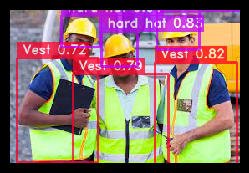

In [29]:
img_url = 'D:/PROJECTS/ibm_hackathon/project_industry/newnew_data/data/p1.jpeg'
best_model.predict(img_url).show()

In [27]:
import torch
device = 0 if torch.cuda.is_available() else "cpu"

input_video_path = "D:/PROJECTS/ibm_hackathon/project_industry/v3.mp4"
output_video_path = "D:/PROJECTS/ibm_hackathon/project_industry/v9.mp4"
#device=0

best_model.to(device).predict(input_video_path).save(output_video_path)

Predicting Video: 100%|██████████| 320/320 [00:33<00:00,  9.55it/s]
